<a href="https://colab.research.google.com/github/mclarafreitas/Topicos-Avancados-em-Informatica-I/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means
Aluna: Maria Clara Moura de Freitas

Matrícula: 20200069048

Referência: https://www.kaggle.com/code/aryanlakhani/customer-segmentation-kmeans-hierarchal-dbscan

O objetivo desta atividade é realizar o clustering de dados utilizando o K-Means. O código utilizado é basicamente o da aula com pequenas modificações do original que foram: os valores, a quantidade de clusters e uma tentativa de normalização. A tentativa de normalização foi feita utilizando Min-Max onde basicamente ele ajusta os valores de cada variável em um intervalo de 0 e 1, onde "X" que anteriormente era o conjunto de dados passa a ser o conjunto de dados que será normalizado e "X_norm" é esse conjunto de dados já normalizado. Quanto ao csv utilizado, peguei o que foi disponibilizado no discord pois tentei utilizar alguns do Kaggle e ficaram com alguns bugs nos quais não consegui resolver.

E estes foram os resultados que cheguei:

O resultado sem a utilização do Min-Max (esqueci de tirar o cluster 4 e 5 do gráfico):
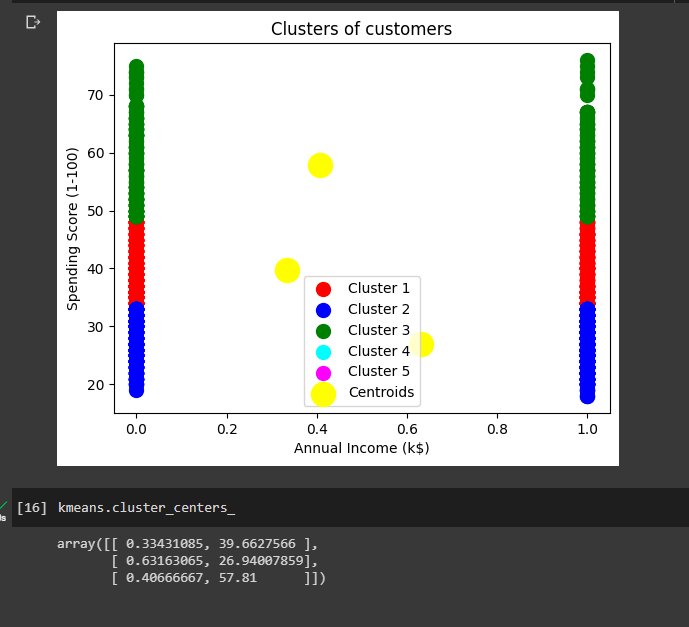

Utilizando o Min-Max:

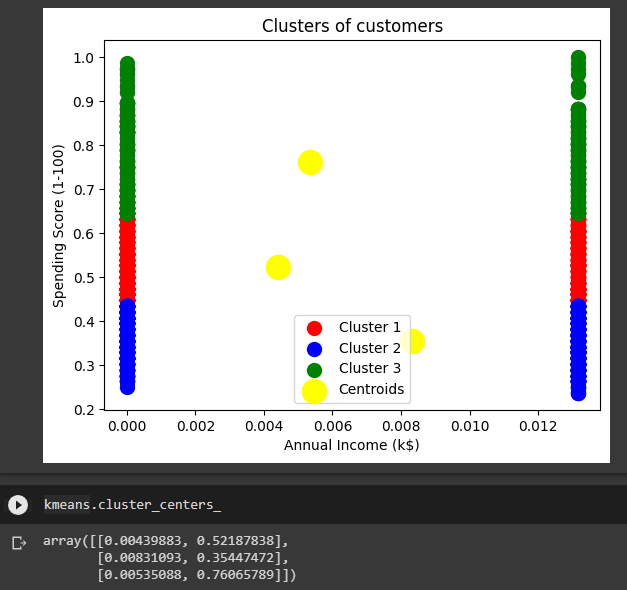

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mclarafreitas/Topicos-Avancados-em-Informatica-I/main/segmentation%20data.csv")

dataset.head(  )

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [13]:
dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [14]:
X = dataset.iloc[:,[2,3]].values

print(X[0:6,:])


[[ 0 67]
 [ 1 22]
 [ 0 49]
 [ 0 45]
 [ 0 53]
 [ 0 35]]


In [15]:
# Normalizando os dados
X_norm = (X - X.min()) / (X.max() - X.min())

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', random_state=1)
y_kmeans = kmeans.fit_predict(X_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


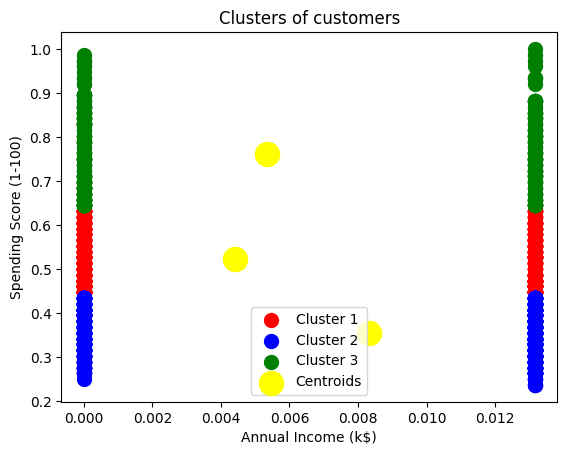

In [17]:
# Visualizando os clusters
plt.scatter(X_norm[y_kmeans == 0, 0], X_norm[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_norm[y_kmeans == 1, 0], X_norm[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_norm[y_kmeans == 2, 0], X_norm[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
kmeans.cluster_centers_

array([[0.00439883, 0.52187838],
       [0.00831093, 0.35447472],
       [0.00535088, 0.76065789]])